In [1]:
from textblob import TextBlob
import csv
import numpy as np

In [2]:
file = open("depressed1.csv","rt")
f = list(csv.reader(file,delimiter=",",quoting=csv.QUOTE_NONE))
data = np.asarray(f)
print(data[:3])
print(data.shape)
#text_list = data[1:,2:3].astype(str)
#print(text_list.shape)
#print(text_list[:5])

[list(['post_id', 'text', 'time', 'likes', 'comments', 'shares'])
 list(['1954413651514091', 'MY FACE #Eccedentesiast', '2017-09-18 02:48:16', '377', '47', '0'])
 list(['2472119273076857', '', '2019-11-07 20:06:23', '26', '5', '0'])]
(232,)


In [3]:
for i in range(data.shape[0]):
    l1 = data[i]
    try:
        text = l1[1]
    except IndexError:
        continue
    print(text)
    if text!="":
        blob1 = TextBlob(text)
        print(blob1.sentiment)

text
Sentiment(polarity=0.0, subjectivity=0.0)
MY FACE #Eccedentesiast
Sentiment(polarity=0.0, subjectivity=0.0)

"Hoping for the best
Sentiment(polarity=1.0, subjectivity=0.3)



"When you do something
Sentiment(polarity=0.0, subjectivity=0.0)


Whomever want to foresee the future must consult the past
Sentiment(polarity=-0.125, subjectivity=0.1875)



Too depressing for the heart
Sentiment(polarity=-0.6, subjectivity=0.9)


I dont feel like i made the same mistake again 💕
Sentiment(polarity=0.0, subjectivity=0.125)
the good moments just don’t outweigh the bad anymore.
Sentiment(polarity=5.551115123125783e-17, subjectivity=0.6333333333333333)


Stressed out pray for me :')
Sentiment(polarity=0.0, subjectivity=0.0)
Its so simple yet so hard
Sentiment(polarity=-0.14583333333333334, subjectivity=0.44940476190476186)
Motivational speaker = el khorti
Sentiment(polarity=0.0, subjectivity=0.0)
"Depressives
Sentiment(polarity=0.0, subjectivity=0.0)
caressing his wedding card 
Sentiment(polari

In [4]:
sentiment_score = []
subjectivity_score = []


for i in range(data.shape[0]):
    
    l1 = data[i]
    try:
        text = l1[1]
    except IndexError:
        continue
    #print(text)
    if text!="":
        blob1 = TextBlob(text)
        sentiment_score.append(blob1.sentiment[0])
        subjectivity_score.append(blob1.sentiment[1])
        
print(len(sentiment_score), len(subjectivity_score))

129 129


(array([ 2., 18., 95., 14.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ]),
 <a list of 4 Patch objects>)

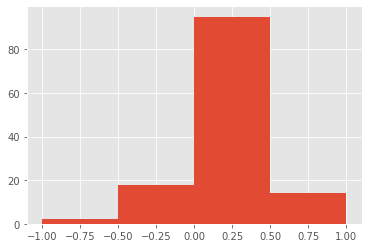

In [5]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')


plt.hist(sentiment_score, bins=[-1.0, -0.5, 0.0, 0.5, 1.0])

(array([102.,  27.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

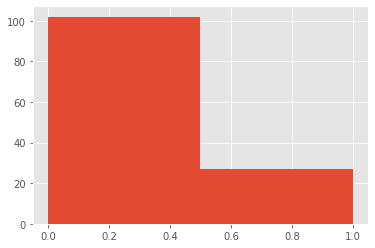

In [6]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')


plt.hist(subjectivity_score, bins=[ 0.0, 0.5, 1.0])

In [7]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import csv
import numpy as np

In [8]:
file = open("depressed1.csv","rt")
f = list(csv.reader(file,delimiter=",",quoting=csv.QUOTE_NONE))
data = np.asarray(f)
print(data[:3])
print(data.shape)
#text_list = data[1:,2:3].astype(str)
#print(text_list.shape)
#print(text_list[:5])

[list(['post_id', 'text', 'time', 'likes', 'comments', 'shares'])
 list(['1954413651514091', 'MY FACE #Eccedentesiast', '2017-09-18 02:48:16', '377', '47', '0'])
 list(['2472119273076857', '', '2019-11-07 20:06:23', '26', '5', '0'])]
(232,)


In [9]:
all_words  = []
documents = []

posts_text = []

In [10]:
for i in range(data.shape[0]):
    l1 = data[i]
    try:
        text = l1[1]
    except IndexError:
        continue
    print(text)
    if text!="":
        posts_text.append(text)

text
MY FACE #Eccedentesiast

"Hoping for the best



"When you do something


Whomever want to foresee the future must consult the past



Too depressing for the heart


I dont feel like i made the same mistake again 💕
the good moments just don’t outweigh the bad anymore.


Stressed out pray for me :')
Its so simple yet so hard
Motivational speaker = el khorti
"Depressives
caressing his wedding card 
Love congratulations "" I said avoiding eye contact
 can I ask you something ?"" He said keeping his head over my shoulder
2019-05-26 04:52:50
"depressed tres fatigué
2019-05-18 11:41:23


Sometimes we expect more from others because we’d be willing to do that much for them. 🤗


C'est à croire que la malchance nous colle à vie
I am all messed up inside.


why







#Lionheart
"When will mom understand that having a Tattoo doesn't mean Im a Bitch 😒😐
2019-01-16 03:56:20
"I gave you my heart but you dug it's grave.
2019-01-16 02:11:01
bangs ( el chocha <3 😅 )
I GOT NOTHING BUT YOU ON MY MIN

In [11]:
from nltk.corpus import stopwords
import re
import os

In [12]:
stop_words = list(set(stopwords.words('english')))

In [13]:
files_pos = os.listdir('aclImdb/train/pos')
files_pos = [open('aclImdb/train/pos/'+f, 'r').read() for f in files_pos[:100]]
files_neg = os.listdir('aclImdb/train/neg')
files_neg = [open('aclImdb/train/neg/'+f, 'r').read() for f in files_neg[:100]]

In [14]:
allowed_word_types = ["J"]

In [15]:
def positive_train_set():
    for p in files_pos:
        documents.append((p,"pos"))
        cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
        tokenized = word_tokenize(cleaned)
        stopped = [w for w in tokenized if not w in stop_words]
        pos = nltk.pos_tag(stopped)
        for w in pos:
            if(w[1][0] in allowed_word_types):
                all_words.append(w[0].lower)
    print(pos[:3])


In [16]:
def negative_train_set():
    for p in files_neg:
        documents.append((p,"neg"))
        cleaned = re.sub(r'[^(a-zA-z)\s]','',p)
        tokenized = word_tokenize(cleaned)
        stopped = [w for w in tokenized if not w in stop_words]
        neg = nltk.pos_tag(stopped)
        for w in neg:
            if(w[1][0] in allowed_word_types):
                all_words.append(w[0].lower)
    print(neg[:3])

In [17]:
import time
import sys
from tqdm import trange

In [18]:
for i in trange(1, file=sys.stdout, desc='outer loop'):
    positive_train_set()
    print("Completed training positive feed")
    negative_train_set()
    print("Completed training negative feed")

outer loop:   0%|          | 0/1 [00:00<?, ?it/s][('I', 'PRP'), ('loved', 'VBD'), ('movie', 'NN')]
Completed training positive feed
[('Student', 'NN'), ('Seduction', 'NNP'), ('finds', 'VBZ')]
Completed training negative feed
outer loop: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


In [19]:
all_words = nltk.FreqDist(all_words)

In [20]:
print(all_words)

<FreqDist with 3917 samples and 3917 outcomes>


In [21]:
word_features = list(all_words.keys())[:5000]

In [22]:
def find_features(document):
    words = word_tokenize(document)
    features= {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [23]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [24]:
print(len(featuresets))

200


In [25]:
classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [26]:
print(posts_text[:5])
for post in posts_text:
    test_features = {word: (word in word_tokenize(post.lower())) for word in all_words}
    res = classifier.classify(test_features)
    print("post - ",post)
    print("classified as - ",res)

['text', 'MY FACE #Eccedentesiast', '"Hoping for the best', '"When you do something', 'Whomever want to foresee the future must consult the past']
post -  text
classified as -  pos
post -  MY FACE #Eccedentesiast
classified as -  pos
post -  "Hoping for the best
classified as -  pos
post -  "When you do something
classified as -  pos
post -  Whomever want to foresee the future must consult the past
classified as -  pos
post -  Too depressing for the heart
classified as -  pos
post -  I dont feel like i made the same mistake again 💕
classified as -  pos
post -  the good moments just don’t outweigh the bad anymore.
classified as -  pos
post -  Stressed out pray for me :')
classified as -  pos
post -  Its so simple yet so hard
classified as -  pos
post -  Motivational speaker = el khorti
classified as -  pos
post -  "Depressives
classified as -  pos
post -  caressing his wedding card 
classified as -  pos
post -  Love congratulations "" I said avoiding eye contact
classified as -  pos
pos

## Creating/ cleaning training data

In [27]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import re
import os

In [28]:
import cv2
import pytesseract

In [29]:
img = cv2.imread('quote.png')
text = pytesseract.image_to_string(img)
print(text)

NEVER iin Rr FOR
NOTIONAL au

  

Pot EMOTIONS =P

x Wa Lat

ax ws ‘i OF THEM ee


In [30]:
img = cv2.imread('quote1.png')
text = pytesseract.image_to_string(img)
print(text)

| don't understand why people get
mad when they get rejected by
somebody or something. They have
done you a favor by not wasting your
time and playing with you.


## Topic modelling

In [31]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [32]:
n_samples = 1000
n_features = 1000
n_components = 10
n_top_words = 20

In [33]:
print("Fetched dataset!")
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]

c_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = "english", max_features = n_features)
c = c_vectorizer.fit_transform(data_samples)

Fetched dataset!


In [34]:
print(data_samples[:2])

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n", "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap 

In [35]:
data_samples = posts_text
print(len(data_samples))

c_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = "english", max_features = n_features)
c = c_vectorizer.fit_transform(data_samples)

129


In [36]:
lda = LatentDirichletAllocation(n_components = n_components, max_iter = 6, 
                                learning_method = "online", learning_offset = 50, random_state = 0)
t0 = time()

lda.fit(c)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50,
                          max_doc_update_iter=100, max_iter=6,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [37]:
feature_names = c_vectorizer.get_feature_names()
#print(feature_names)
print(lda.components_)
print(lda.components_.shape)

[[ 0.61885693  0.61813513  0.62442196  0.52064276  0.52452521  0.61865064
   0.63607     0.53528994  0.55098455  0.54557859  0.60450368  0.51970135
   0.48678866  0.59780367  0.64640244  0.46322738  0.64296597  0.67250422
   0.48824099  0.44086029  0.66001991  0.58927348  0.4810473   0.4647168
   0.5054913   0.50880214  0.45636736  0.51934929  0.48789717  0.54818487
   0.52810495  0.5502262   0.49975257  0.51231507  0.4916114   0.45157435
   0.45566938  0.86045747  0.56516524  0.53564908  0.54894374  0.49744989
   0.51470788  0.53213576  0.47587922  0.68334782  0.55205759  0.45970219
   0.5880546   0.52089845  0.51042866  0.59031585  0.54669298  0.63332999
   0.53555246  0.54892362  0.47124311  0.57731368  0.51010176  0.49460379
   1.36019505  0.60696479  0.51674393  0.63814974  0.96225605  0.57491237
   0.80388793  0.47878992  0.54384784  0.59571506  0.50893931]
 [ 0.87967023  0.49356991  0.77550432  0.7559138   1.00568437  1.24802035
   1.02809993  1.59896742  1.36219369  0.84567609 

In [38]:
for topic_idx, topic in enumerate(lda.components_):
    message = "Topic %d: " % topic_idx
    message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
print()

Topic 0: time way hard worth know 29 47 23 26 want 10 past 03 01 09 02 trying 17 2019 ｍｅ
Topic 1: 2018 past 11 36 13 09 people 59 miss 17 10 08 01 hold 16 47 end 20 03 05
Topic 2: 2019 best 03 05 01 2018 wish 16 20 41 hard 26 59 29 23 11 love 10 09 night
Topic 3: trying ne que je thoughts لا anymore ce doesn don good ai vie est want hold il 23 2019 41
Topic 4: 02 2018 01 day hard 09 10 16 47 11 know nice 25 2019 41 29 13 dont time 26
Topic 5: el night head inside keeping worth said wish day nice que got 11 heart 08 2018 09 way best لا
Topic 6: love rest ｓａｖｅ ｂａｂｅ ｍｅ end head said heart 17 ai 41 keeping vie don il la best je anymore
Topic 7: gave heart ai love mind ne 08 thoughts got el ce il best 47 26 keeping stressed ｍｅ hard 03
Topic 8: stressed people 2019 02 good inside night ce 26 29 anymore hard vie 2018 la past 36 end 23 dont
Topic 9: feel mind got dont la vie il est keeping rest 59 people 20 way 09 ｓａｖｅ el don لا gave



In [39]:
from selenium import webdriver
import datetime
import time
import argparse
import os
from bs4 import BeautifulSoup as bs_4
import requests
import urllib.request

In [40]:
parser = argparse.ArgumentParser()
parser.add_argument('-url', '--url', help='URL to the online repository of images')
args = vars(parser.parse_args())
url = args['url']

usage: ipykernel_launcher.py [-h] [-url URL]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/rishitha/.local/share/jupyter/runtime/kernel-b71e5453-b584-4595-9e3d-57e2cbca9195.json


SystemExit: 2

/home/rishitha/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [43]:
url = "https://www.facebook.com/pg/vidhi.bekaroo/posts/?ref=page_internal"

album_name = url.split('/')[-3]+'_posts'
print(album_name)

options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")

driver = webdriver.Chrome(chrome_options=options)
driver.get(url)

vidhi.bekaroo_posts


/home/rishitha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [44]:
pause_time = 2

last_height = driver.execute_script("return document.body.scrollHeight")

start = datetime.datetime.now()

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(pause_time)

    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

end = datetime.datetime.now()
delta = end-start
print("[INFO] Total time taken to scroll till the end {}".format(delta))

[INFO] Total time taken to scroll till the end 0:05:50.617583


In [45]:
link_tags = driver.find_elements_by_tag_name('a')

hrefs = []

for tag in link_tags:
    if "theater" not in tag.get_attribute('rel'):
        continue
    hrefs.append(tag.get_attribute('href'))

dir_name = 'img_pg_links'
if not os.path.exists(dir_name):
    try:
        os.mkdir(dir_name)
    except OSError:
        print ("[INFO] Creation of the directory {} failed".format(os.path.abspath(dir_name)))
    else:
        print ("[INFO] Successfully created the directory {} ".format(os.path.abspath(dir_name)))

f = open("{}/{}.csv".format(dir_name, album_name),'w')
f.write(",\n".join(hrefs))
print ("[INFO] Successfully created the file {}.csv with {} links".format(album_name, len(hrefs)))

[INFO] Successfully created the file vidhi.bekaroo_posts.csv with 1799 links


In [46]:
f = open('img_pg_links/vidhi.bekaroo_posts.csv','r')
links = f.read().split(',')

print ("[INFO] Downloading {} images".format(len(links)))

def download_image(url):
    print("[INFO] downloading {}".format(url))
    name = str(url.split('/')[-1])
    urllib.request.urlretrieve(url,os.path.join(dir_path, name))

for href in links[2:6]:
    print(href)
    img_page = requests.get(href)
    soup = bs_4(img_page.content,'html.parser')
    img_class = soup.find_all('meta')
    for i in img_class:
        print(i)
        print()
#     img_page = requests.get(href)
#     soup = bs_4(img_page.content, 'html.parser')
#     img_class = soup.find_all('meta', attrs={"name":"twitter:image"})
#     img_url = img_class[0].get('content')
#     real_url = img_url.replace('XL', 'X3', 2)
#     download_image(real_url)

[INFO] Downloading 1799 images

https://www.facebook.com/vidhi.bekaroo/photos/a.228951837780326/432676614074513/?type=3&__xts__%5B0%5D=68.ARAjHBpUpOUOVWo5MjSeCkhK_9U5Xyr9ZobXMkjtW8ycCQ_WP6ApXrrmgseelKYSOFCYDWQ40zupKIHAkMLjHUiVYD9skNybg1OAQ62x3J87tsC6Cz_ttjIbEikpe84shw-jA857jU6sxLIes0jftCjHirhlAE41_LhPBUMjAqKN6YyfLYpmjbTulSwCN3jAwOufB2bjPRDsL7hYfZ03_sRtbjEvUXIyWoiAg-11uRJ69VqAaSUn6bgDBn5EQGlQWBZtmHMxfjjawsQl5o9iMzwQ8A_FQesOZHETq-cV9LR579dYs-kB_0CTemXQOuMCXSR3iKDPycngeh8GAqDIWe8&__tn__=-R
<meta charset="utf-8"/>

<meta content="default" id="meta_referrer" name="referrer"/>

<meta content="0; URL=/vidhi.bekaroo/photos/a.228951837780326/432676614074513/?type=3&amp;__xts__%5B0%5D=68.ARAjHBpUpOUOVWo5MjSeCkhK_9U5Xyr9ZobXMkjtW8ycCQ_WP6ApXrrmgseelKYSOFCYDWQ40zupKIHAkMLjHUiVYD9skNybg1OAQ62x3J87tsC6Cz_ttjIbEikpe84shw-jA857jU6sxLIes0jftCjHirhlAE41_LhPBUMjAqKN6YyfLYpmjbTulSwCN3jAwOufB2bjPRDsL7hYfZ03_sRtbjEvUXIyWoiAg-11uRJ69VqAaSUn6bgDBn5EQGlQWBZtmHMxfjjawsQl5o9iMzwQ8A_FQesOZHETq-cV9LR579dYs-kB_0CTe